Задание: проверить гипотезы
1) Мужчины пропускают в течение года более 2 рабочих дней (work_days) по 
болезни значимо чаще женщин.
2) Работники старше 35 лет (age) пропускают в течение года более 2 рабочих 
дней (work_days) по болезни значимо чаще своих более молодых коллег.

По формулировке гипотез - я не совсем поняла, как именно проверить статестом разницу в распределениях частот, так как в самих данных у нас нет временных промежутков, когда кто брал больничный и изменение частоты взятия больничных по гендеру и возрасту мы отследить не можем, поэтому с желанием провести тесты я определила следующие гипотезы, которые возможно не совсем отвечают задумке этого задания

По первой части задания: 
HO: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у мужчин и женщин одинаково.
H1: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у мужчин и женщин различается значимо.

По второй части задания:
HO: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у работников старше 35 лет и моложе 35 лет одинаково.
H1: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у работников старше 35 лет и моложе 35 лет различается значимо.

В дашборде возможно регулировать параметры тестов и графиков с помощью слайдеров под гистограммами, в ноутбуке это возможно при изменении значений переменных, там где это обозначено комментарием.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import io
import chardet

In [11]:
file_path = 'М.Тех_Данные_к_ТЗ_DS.csv'

# Определение кодировки файла - при тестах у меня показал кодировку файла windows-1251, поэтому дефолтная utf_8 не срабатывала (в любом случае так код универсальнее)
with open(file_path, 'rb') as file:
    detector = chardet.universaldetector.UniversalDetector()
    for line in file:
        detector.feed(line)
        if detector.done:
            break
    detector.close()
    file_encoding = detector.result['encoding']

# Чтение данных с определенной кодировкой
data = pd.read_csv(file_path, encoding=file_encoding, engine='python')

In [13]:
# приведение датафрейма к рабочему виду, распределение по колонкам
data = data['Количество больничных дней,"Возраст","Пол"'].str.split(',', expand=True)
data.columns = ['Количество больничных дней', 'Возраст', 'Пол']
data['Пол'] = data['Пол'].str.replace('"', '')
data['Количество больничных дней'] = data['Количество больничных дней'].astype('int')
data['Возраст'] = data['Возраст'].astype('int')

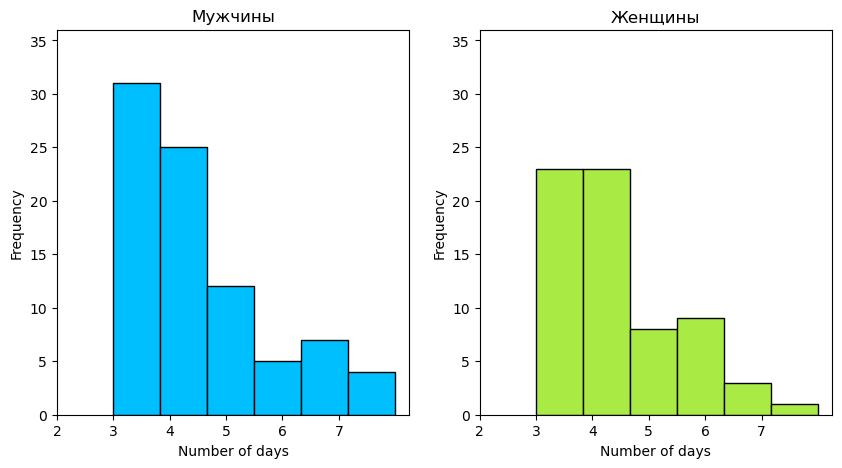

In [15]:
work_days = 2 # тут можно задать количество рабочих дней
filtered_data_men = data[(data['Пол'] == 'М') & (data['Количество больничных дней'] > work_days)]
hist_values_men, bin_edges_men = np.histogram(filtered_data_men['Количество больничных дней'], bins=filtered_data_men['Количество больничных дней'].nunique())

fig = plt.figure()
fig.set_size_inches(10, 5)

#строим гистограмму распределения для мужчин
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.set(title = 'Мужчины')
plt.hist(filtered_data_men['Количество больничных дней'], bins=bin_edges_men, color="#00bfff", edgecolor='black')

# Добавляем подписи к осям
ax_1.set_xlabel('Number of days')
ax_1.set_ylabel('Frequency')
ax_1.set_ylim(0, max(hist_values_men) + 5) # масштаб оси y специально один у двух графиков - для наглядности
ax_1.set_xticks(range(work_days, work_days + len(hist_values_men)))

#строим гистограмму распределения для женщин
ax_2 = fig.add_subplot(1, 2, 2)
ax_2.set_title('Женщины')
filtered_data_women = data[(data['Пол'] == 'Ж') & (data['Количество больничных дней'] > work_days)]
hist_values_women, bin_edges_women = np.histogram(filtered_data_women['Количество больничных дней'], bins=filtered_data_women['Количество больничных дней'].nunique())
plt.hist(filtered_data_women['Количество больничных дней'], bins=bin_edges_women, color="#a9ea44", edgecolor='black')

# Добавляем подписи к осям
ax_2.set_xlabel('Number of days')
ax_2.set_ylabel('Frequency')
ax_2.set_ylim(0, max(hist_values_men) + 5)
ax_2.set_xticks(range(work_days, work_days + len(hist_values_women)))

# Отображаем графики
plt.show()

In [16]:
# Для сравнения частоты я не догадалась как использовать статтесты, но можем вывести обычное процентное соотношение, тоже интерактивное со слайдером
print('Процентное соотношение частоты взятия больничных:')
print(f'Мужчины берут больничный более {work_days} work-days на {(filtered_data_men.shape[0]-filtered_data_women.shape[0])*100/filtered_data_women.shape[0] :.0f}% чаще, чем женщины.')


Процентное соотношение частоты взятия больничных:
Мужчины берут больничный более 2 work-days на 25% чаще, чем женщины.


In [17]:
# Статтест для проверки гипотез, и вывод его параметров и результатов
print('T-test (двухвыборочный) для проверки гипотезы о гендерных различиях в статистике:')
h0_gender = f'Среднее количество пропущенных рабочих дней по болезни (более {work_days} work-days) у мужчин и женщин одинаково.'
h1_gender = f'Среднее количество пропущенных рабочих дней по болезни (более {work_days} work-days) у мужчин и женщин различается значимо.'
print(f'HO: {h0_gender}\nH1: {h1_gender}')
t_stat_gender, p_value_gender = stats.ttest_ind(filtered_data_women['Количество больничных дней'],
                                      filtered_data_men['Количество больничных дней'])
if p_value_gender < 0.05:
    hyp_gender = h1_gender
else:
    hyp_gender = h0_gender
    
print(f'Men vs Women:\n'
                  f't-статистика: {t_stat_gender:.2f}\n'
                  f'p-значение: {p_value_gender:.4f}')
print(f'Принятый уровень значимости: 0.05\n'
            f'По итогу теста верна гипотеза: {hyp_gender}\n')


T-test (двухвыборочный) для проверки гипотезы о гендерных различиях в статистике:
HO: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у мужчин и женщин одинаково.
H1: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у мужчин и женщин различается значимо.
Men vs Women:
t-статистика: -0.42
p-значение: 0.6781
Принятый уровень значимости: 0.05
По итогу теста верна гипотеза: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у мужчин и женщин одинаково.



**Вторая часть задания - исследования возрастных различий**


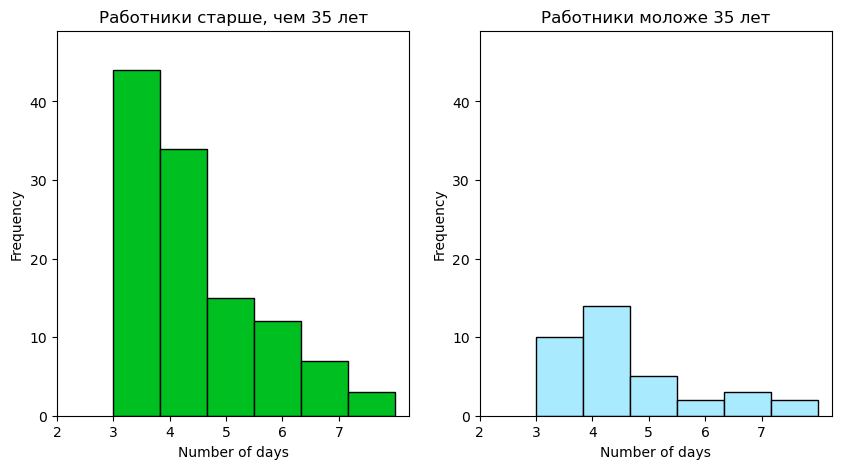

In [18]:
work_days_2 = 2 # здесь можно задать количество дней
age = 35 # здесь можно задать возраст

fig = plt.figure()
fig.set_size_inches(10, 5)

# строим гистограмму распределения для старших работников
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.set_title(f'Работники старше, чем {age} лет')
filtered_data_old = data[(data['Возраст'] > age ) & (data['Количество больничных дней'] > work_days_2)]
hist_values_old, bin_edges_old = np.histogram(filtered_data_old['Количество больничных дней'], bins=filtered_data_old['Количество больничных дней'].nunique())

plt.hist(filtered_data_old['Количество больничных дней'], bins=bin_edges_old, color="#00bf21", edgecolor='black')

# Добавляем подписи к осям
ax_1.set_xlabel('Number of days')
ax_1.set_ylabel('Frequency')
ax_1.set_ylim(0, max(hist_values_old) + 5) # масштаб опять одинаковый для обоих графиков
ax_1.set_xticks(range(work_days_2, work_days_2 + len(hist_values_old)))

# То же самое для молодых работников
ax_2 = fig.add_subplot(1, 2, 2)
ax_2.set_title(f'Работники моложе {age} лет')
filtered_data_young = data[(data['Возраст'] <= age ) & (data['Количество больничных дней'] > work_days_2)]
hist_values_young, bin_edges_young = np.histogram(filtered_data_young['Количество больничных дней'], bins=filtered_data_young['Количество больничных дней'].nunique())

plt.hist(filtered_data_young['Количество больничных дней'], bins=bin_edges_young, color="#a9eaff", edgecolor='black')

# Добавляем подписи к осям
ax_2.set_xlabel('Number of days')
ax_2.set_ylabel('Frequency')
ax_2.set_ylim(0, max(hist_values_old) + 5)
ax_2.set_xticks(range(work_days_2, work_days_2 + len(hist_values_young)))

# Отображаем график
plt.show()


In [19]:
# Процентная статистика соотношения
print('Процентное соотношение частоты взятия больничных:')
print(f'Работники старше {age} лет берут больничный более {work_days} work-days на {(filtered_data_old.shape[0] - filtered_data_young.shape[0]) * 100 / filtered_data_young.shape[0] :.0f}% чаще, чем работники моложе {age} лет.')


Процентное соотношение частоты взятия больничных:
Работники старше 35 лет берут больничный более 2 work-days на 219% чаще, чем работники моложе 35 лет.


In [20]:
#  Статтест для проверки гипотез, и вывод его параметров и результатов
print('T-test (двухвыборочный) для проверки гипотезы о возрастных различиях в статистике:')
h0_age = f'Среднее количество пропущенных рабочих дней по болезни (более {work_days_2} work-days) у работников старше {age} лет и моложе {age} лет одинаково.'
h1_age = f'Среднее количество пропущенных рабочих дней по болезни (более {work_days_2} work-days) у работников старше {age} лет и моложе {age} лет различается значимо.'
print(f'HO: {h0_age}\nH1: {h1_age}')
t_stat_age, p_value_age = stats.ttest_ind(filtered_data_old['Количество больничных дней'],
                                      filtered_data_young['Количество больничных дней'])
if p_value_age < 0.05:
    hyp_age = h1_age
else:
    hyp_age = h0_age
print(f'Old vs Young:\n'
      f't-статистика: {t_stat_age:.2f}\n'
      f'p-значение: {p_value_age:.4f}')
print(f'Принятый уровень значимости: 0.05\n'
      f'По итогу теста верна гипотеза: {hyp_age}\n')

T-test (двухвыборочный) для проверки гипотезы о возрастных различиях в статистике:
HO: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у работников старше 35 лет и моложе 35 лет одинаково.
H1: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у работников старше 35 лет и моложе 35 лет различается значимо.
Old vs Young:
t-статистика: -0.76
p-значение: 0.4488
Принятый уровень значимости: 0.05
По итогу теста верна гипотеза: Среднее количество пропущенных рабочих дней по болезни (более 2 work-days) у работников старше 35 лет и моложе 35 лет одинаково.

